In [43]:
import networkx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import importlib
import quasibi
import cartopy.crs as ccrs
importlib.reload(quasibi);

In [2]:
# load the correlation matrices
pearson = quasibi.load_symmat("../output/pearson_correlation_matrix.npy")
pearson = np.abs(pearson) >= np.quantile(np.abs(pearson), 0.995)

rmd     = quasibi.load_symmat("../output/rmd_correlation_matrix.npy")
rmd     = np.abs(rmd) >= np.quantile(np.abs(rmd), 0.995)

In [3]:
# load the distance matrix
D = quasibi.load_symmat("../output/distance.npy")

# load the latitude and longitude
LAT, LON = np.load("../output/latlon_nodes.npz").values()

In [4]:
S = 200
pearson_surrogates = quasibi.create_surrogate_adjacency_matrix(pearson, D, S)
rmd_surrogates     = quasibi.create_surrogate_adjacency_matrix(rmd, D, S)

### Area Weighted Connectivity

In [26]:
# PV, PC, PB = quasibi.network_metric(pearson, quasibi.awc, pearson_surrogates, LAT=LAT)
# RV, RC, RB = quasibi.network_metric(rmd,     quasibi.awc, rmd_surrogates,     LAT=LAT)
# np.savez("../output/metrics/awc", PV, PC, PB, RV, RC, RB)

100%|██████████| 200/200 [00:04<00:00, 42.29it/s]


### Betweenness

### Closeness

In [21]:
PV, PC, PB = quasibi.network_metric(pearson, quasibi.closeness, pearson_surrogates)
RV, RC, RB = quasibi.network_metric(rmd,     quasibi.closeness, rmd_surrogates)
np.savez("../output/metrics/closeness", PV, PC, PB, RV, RC, RB)

KeyboardInterrupt: 

### Clustering Coefficient

In [25]:
# PV, PC, PB = quasibi.network_metric(pearson, quasibi.clustering_coefficient, pearson_surrogates)
# RV, RC, RB = quasibi.network_metric(rmd,     quasibi.clustering_coefficient, rmd_surrogates)
# np.savez("../output/metrics/clustering_coefficient", PV, PC, PB, RV, RC, RB)

100%|██████████| 200/200 [00:05<00:00, 37.89it/s]


# Plots

In [38]:
def plot_metric(P, R):

    # difference between pearson and rmd metric
    D = P - R

    fig, axs = plt.subplots(3, 1, figsize=(5*1.6*3, 5*1.6), subplot_kw={"projection": ccrs.PlateCarree()})

    vmin = min(np.min(P), np.min(R))
    vmax = max(np.max(P), np.max(R))
    v    = max(abs(np.min(D)), abs(np.max(D)))

    for i, (ax, m) in enumerate(zip(axs, [P, R, D])):
        cmap = "RdBu_r" if i == 2 else "Greens"

        ax.coastlines()
        cmap = ax.imshow(m, extent=[np.min(LON), np.max(LON), np.min(LAT), np.max(LAT)], cmap=cmap, vmin=-v if i == 2 else vmin, vmax = v if i == 2 else vmax)

        ax.set_title(["Pearson", "RMD", "Difference"][i])
        cbar = fig.colorbar(cmap, ax=ax, location="right", shrink=1, pad=0.01)
        cbar.formatter.set_powerlimits((0, 0))

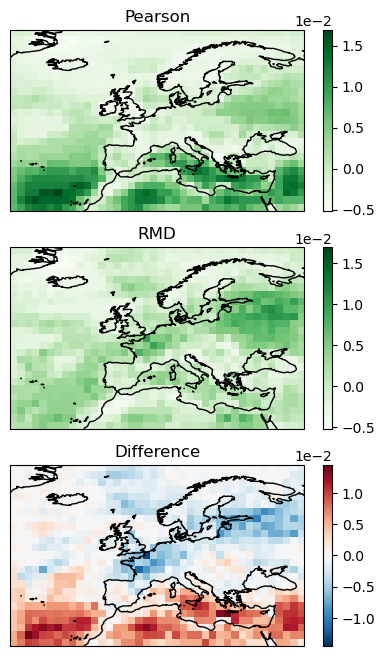

In [39]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/awc.npz").values()
plot_metric(PC, RC)

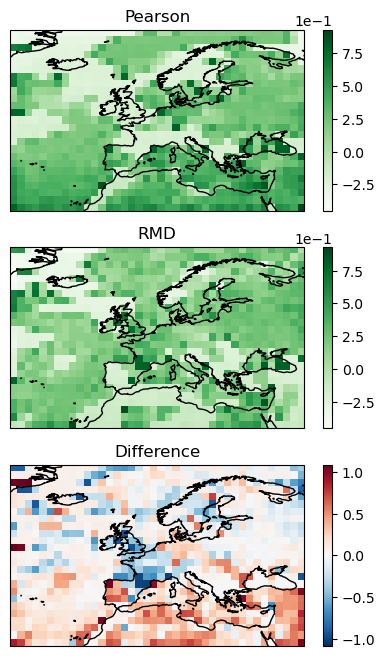

In [40]:
PV, PC, PB, RV, RC, RB = np.load("../output/metrics/clustering_coefficient.npz").values()
plot_metric(PC, RC)

In [44]:
net = networkx.from_numpy_matrix(pearson)
networkx.centrality(net)

TypeError: 'module' object is not callable